<a href="https://colab.research.google.com/github/kabirchhabra/Skillslash/blob/main/K_Means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

+ Clustering algorithms are unsupervised learning algorithms.
+ Classes are not known a priori(before hand).
+ Whereas classification problems are supervised learning algorithms (where classes are known a priori in the training data).

In [1]:
# we dont have any label in unsupervised algorithms like x and y

+ Clustering is descriptive analytics whereas classification is usually a predictive analytics algorithm.
+ The main objective of clustering is to create heterogeneous subsets (clusters) from the original dataset.
+ The records within a cluster are homogeneous and identify the characteristics that differentiate the subsets.
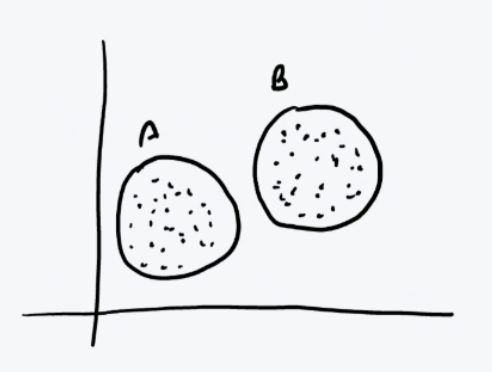

**Clustering algorithms:**
+ Widely used in customer segmentation- for eg developing marketing strategies targeting different groups of customers.
+ Detecting fraudlent insurance claims.
+ Social media network analysis.
+ General EDA tool to understand patterns in the data.

**How clustering work?**
+ Clustering algorithms use different  distance measures to derive the different clusters.
+ Larger distance would imply that observations are far away from one another.
+ Whereas higher similarity would indicate that observations are similar.

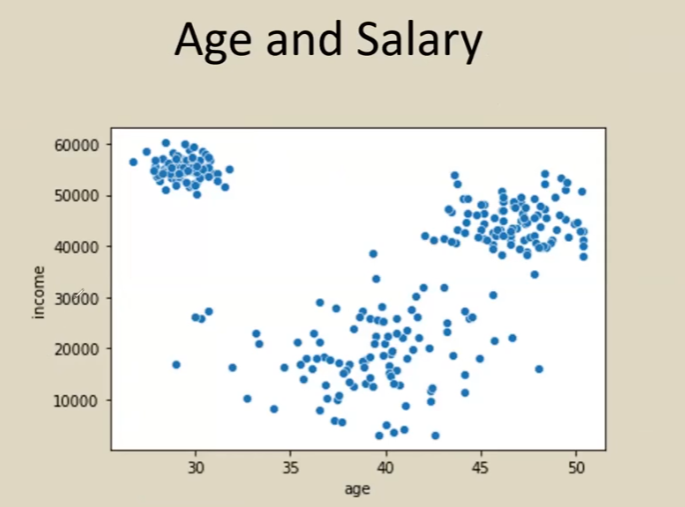







**Finding similarities using distances**
+ Clustering techniques assume that there are subsets in the data that are similar or homogeneous.
+ One approach for measuring similarity is through distances measured using different metrics.

**Distances**
> Euclidean distance:
+ Radial distance between two observations or records.
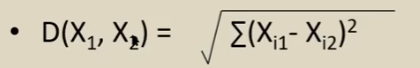
+ where xi1 is the value of ith feature of first observation and xi2 is the values of ith feature for second observation.

> Other distances measures used are Minkowski distance(a generalised distance measure), Jaccard Similarity coefficient (binary form data), Cosine Similarity (n-dimensional vectors) and Gower's Similarity Coefficient (quant and qual data)



# K Means Clustering

+ It is the most popular clustering algorithm.
+ It is a clustering method in which the number of clusters (K) is decided before hand.
+ The observations in the sample are assigned to one of the clusters (say C1, C2,...,Ck) based on the distance between the observation and the centroid of the clusters.

**Steps:**

+ Decide the value of K-which can be fine-tuned later.
+ Choose K observations from the data that are likely to be in different clusters.
+ There are many ways of choosing these inital K values; the easiest approach is to choose the observations that are farthest (in one of the parameters of the data).
+ The K observations selected in step 2 are the centroids of those clusters.
+ For remaining observations, find the cluster closest to the centroid.
+ Add the new observation (say observation j) to the cluster with the closest centroid.
+ Adjust the centroid after adding a new observation to the cluster.
+ The closest centroid is chosen based upon an appropriate distance measure.
+ Repeat above step until all observations are assigned to a cluster.


In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('beer.csv')
df.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
scaled_df = scaler.fit_transform(df[['calories', 'sodium', 'alcohol', 'cost']])

In [11]:
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, random_state=101)
  clusters.fit(scaled_df)
  cluster_errors.append(clusters.inertia_)

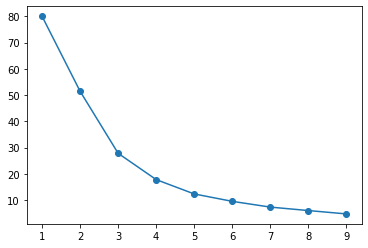

In [19]:
plt.plot(cluster_range, cluster_errors, marker='o')
plt.show()

K=3 or K=4 can be chosen because after the inertia getting near to constant.

In [20]:
k=3
clusters = KMeans(n_clusters=k, random_state=101)
clusters.fit(scaled_df)
df['clusterid'] = clusters.labels_

In [21]:
df.head(10)

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0
